<a href="https://colab.research.google.com/github/xfo-03/Detection-of-deepfake-videos/blob/main/Deepfake_detect_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Module Description



*   Import Library
*   Frame Analysis Visualization - three types of feature extraction process - Histogram analysis, Edge analysis and texture analysis
*   Feature Extraction - feature extraction done on the frames
*   Save extracted features as csv file
*   Read file and convert to Dataframe (the three types of features are splt into three dataframe)
*   Splitting dataset and performing necessary operations on the dataset - like converting to float
*   Model training sparately for all the three features and combining the models.
*   Model testing for the three models and combined model.




In [ ]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras

import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.filters import gabor_kernel
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os
from google.colab.patches import cv2_imshow
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/Deepfake_Detection_Project/Dataset

Mounted at /content/drive


#Frame analysis visualization

In [ ]:
# Function for feature extraction using histogram analysis
def histogram_analysis(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist([gray], [0], None, [170], [0, 170])
  return hist.flatten()

# Function for feature extraction using Canny edge detection
def canny_edge_detection(image):
    edges = cv2.Canny(image, threshold1=100, threshold2=200)
    edge_count = np.sum(edges > 0)
    edge_length = np.sum(edges)
    average_intensity = np.mean(image[edges > 0])
    return edge_count, edge_length, average_intensity

# Function for feature extraction using LBP texture analysis
def lbp_texture_analysis(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  radius = 3
  n_points = 8 * radius
  lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
  
  # Calculate histogram of LBP values
  hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
  
  # Normalize the histogram
  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)
  
  return hist

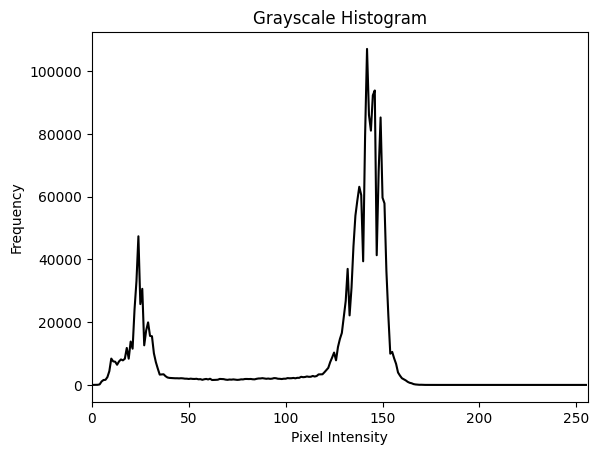

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/drive/MyDrive/image_dataset_c40/Dataset_model/actors_preprocessed/actors_01__hugging_happy/0001.png')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Plot histogram
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


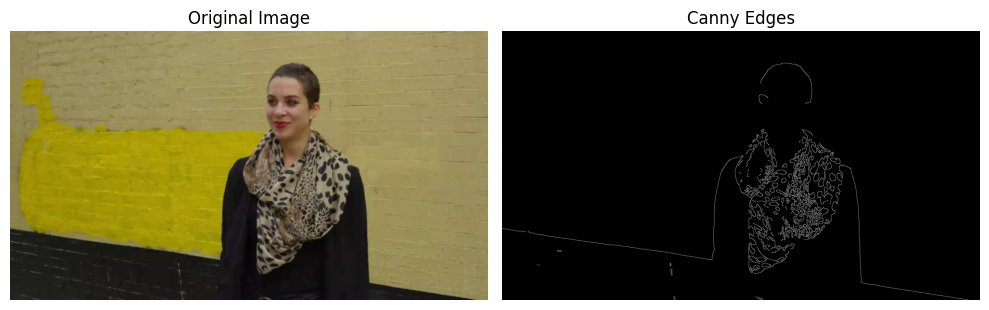

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/drive/MyDrive/image_dataset_c40/Dataset_model/actors_preprocessed/actors_01__hugging_happy/0001.png')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(gray, 100, 200)
print(edges)
# Plot the original image and the edges
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.tight_layout()
plt.show()


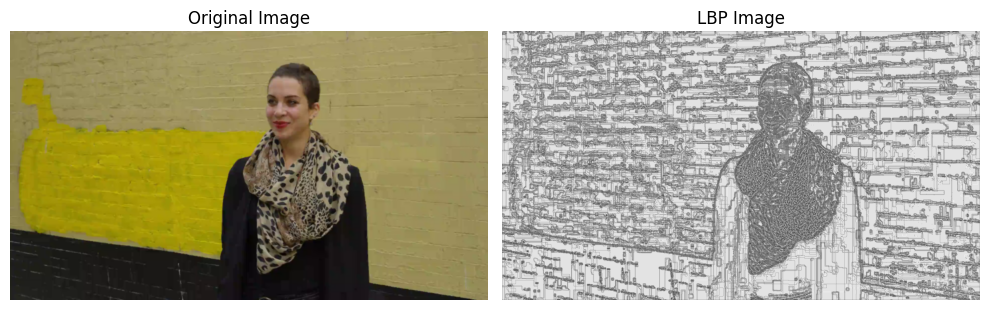

In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/drive/MyDrive/image_dataset_c40/Dataset_model/actors_preprocessed/actors_01__hugging_happy/0001.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform LBP texture analysis
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

# Plot the original image and the LBP image
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')

plt.tight_layout()
plt.show()


#Feature Extraction

In [ ]:
image = cv2.imread('/content/drive/MyDrive/image_dataset_c40/Dataset_model/actors_preprocessed/actors_01__hugging_happy/0001.png')
hist_features = histogram_analysis(image)
# print(hist_features)
# len(hist_features)

In [ ]:
# edge_features = canny_edge_detection(image)
num_edges, total_length, avg_intensity = canny_edge_detection(image)
print(num_edges)  
print(total_length)            
print(avg_intensity)                      

In [ ]:
lbp_features = lbp_texture_analysis(image)
print(lbp_features)            

In [ ]:
# Specify the root directory
root_dir = '/content/drive/MyDrive/image_dataset_c40/Dataset_model/Face2Face_preprocessed'
data_file = '/content/drive/MyDrive/image_dataset_c40/new_features/Face2Face_feat.txt'

# Loop through the subfolders
with open(data_file, 'a') as file1:
  for folder_name in os.listdir(root_dir):
      folder_path = os.path.join(root_dir, folder_name)
      
      try:
        # Perform feature extraction for each image in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Read the image and Extract features using histogram analysis, Canny edge detection, LBP texture analysis
            image = cv2.imread(file_path)
            hist_features = histogram_analysis(image)
            num_edges, total_length, avg_intensity = canny_edge_detection(image)
            lbp_features = lbp_texture_analysis(image)

            # extract label from image name
            # if 'real' in file_name:
            #     label = 1
            # else:
            #     label = 0
            label = 0
            Folder_File_name = folder_name + '__' + file_name
            # file_names.append(Folder_File_name)
            file1.write(f"{Folder_File_name},{hist_features},{num_edges},{total_length},{avg_intensity},{lbp_features},{label}\n")
           
      except Exception as e:
        continue

In [ ]:
data_file = '/content/drive/MyDrive/image_dataset_c40/new_features/actors_feat.txt'

with open(data_file, 'r') as file:
    contents = file.read()

print(contents)


#Read file and convet dataframe

In [ ]:
null_count = final_df['LBP_Features'].isnull().sum()
print("Number of null values:", null_count)


Number of null values: 0


In [ ]:
import pandas as pd

# Replace '/content/drive/MyDrive/data.csv' with your file path
final_df = pd.read_csv('/content/drive/MyDrive/image_dataset_c40/final_df.csv')


In [ ]:
final_df.head()

,File_Name,Hist_Features,Num_Edges,Total_Length,Avg_Intensity,LBP_Features,Label
0,FaceSwap_065_089__0101.png,[1.66800000e+03 1.74600000e+03 1.11700000e+03 ...,5191,1323705,100.548578,[3.49718000e+05 2.06163000e+05 2.58898000e+05 ...,0
1,FaceSwap_065_089__0107.png,[1.61900000e+03 1.76800000e+03 1.15400000e+03 ...,5330,1359150,101.051157,[3.50586000e+05 2.12457000e+05 2.69857000e+05 ...,0
2,FaceSwap_065_089__0124.png,[1.69700000e+03 1.73600000e+03 1.13000000e+03 ...,5531,1410405,101.106913,[3.43099000e+05 2.10395000e+05 2.60959000e+05 ...,0
3,FaceSwap_065_089__0396.png,[1.85400000e+03 2.19400000e+03 1.62400000e+03 ...,5668,1445340,99.042108,[3.58832000e+05 2.09961000e+05 2.73655000e+05 ...,0
4,FaceSwap_065_089__0393.png,[1.8400000e+03 2.2180000e+03 1.6210000e+03 5.0...,5858,1493790,98.988107,[3.74566000e+05 2.09201000e+05 2.88411000e+05 ...,0


#Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Assume you have a DataFrame called df

# Split the DataFrame into features (X) and target variable (y)
X = final_df.drop('Label', axis=1)  # Exclude the target column from the features
y = final_df['Label']  # Extract the target column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (30430, 6) (30430,)
Test set shape: (5370, 6) (5370,)


In [ ]:
X_train.tail

In [ ]:
train_df1 = X_train.iloc[:, [1]].copy()
train_df2 = X_train.iloc[:, [2, 3, 4]].copy()
train_df3 = X_train.iloc[:, [5]].copy()

In [ ]:
test_df1 = X_test.iloc[:, [1]].copy()
test_df2 = X_test.iloc[:, [2, 3, 4]].copy()
test_df3 = X_test.iloc[:, [5]].copy()

#Convert the array values to floats

In [ ]:
import re
from decimal import Decimal
train_df3['LBP_Features'] = train_df3['LBP_Features'].apply(lambda x: [float(val) for val in re.findall(r'[\d.]+(?:e[+-]?\d+)?', x)])
test_df3['LBP_Features'] = test_df3['LBP_Features'].apply(lambda x: [float(val) for val in re.findall(r'[\d.]+(?:e[+-]?\d+)?', x)])



In [ ]:
train_df3['LBP_Features'].head

<bound method NDFrame.head of 7911     [296984.0, 145291.0, 478407.0, 518446.0, 46951...
3989     [1447065.0, 639273.0, 1667167.0, 1394481.0, 12...
18041    [299383.0, 226948.0, 246287.0, 287905.0, 30507...
30195    [620443.0, 213759.0, 584093.0, 511285.0, 52528...
10779    [1299552.0, 302011.0, 910373.0, 902054.0, 1027...
                               ...                        
16850    [41276.0, 257716.0, 305025.0, 397955.0, 426505...
6265     [1308919.0, 419271.0, 102474.0, 998047.0, 1027...
11284    [746745.0, 283637.0, 914388.0, 751194.0, 72070...
860      [311523.0, 166341.0, 322591.0, 367839.0, 41113...
15795    [347849.0, 14294.0, 331983.0, 405575.0, 365355...
Name: LBP_Features, Length: 30430, dtype: object>

In [ ]:
train_df1['Hist_Features'] = train_df1['Hist_Features'].apply(lambda x: [float(val) for val in re.findall(r'[\d.]+(?:e[+-]?\d+)?', x)])
test_df1['Hist_Features'] = test_df1['Hist_Features'].apply(lambda x: [float(val) for val in re.findall(r'[\d.]+(?:e[+-]?\d+)?', x)])

In [ ]:
train_df1['Hist_Features'].head

<bound method NDFrame.head of 7911     [279.0, 450.0, 449.0, 282.0, 341.0, 325.0, 256...
3989     [0.0, 0.0, 0.0, 0.0, 6000.0, 0.0, 3200.0, 1.0,...
18041    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20000.0, 0.0, 5...
30195    [247.0, 874.0, 425.0, 471.0, 487.0, 1388.0, 28...
10779    [79703.0, 5777.0, 3375.0, 1583.0, 1000.0, 973....
                               ...                        
16850    [44365.0, 81014.0, 25706.0, 17431.0, 21049.0, ...
6265     [295.0, 2430.0, 3035.0, 2337.0, 2094.0, 2296.0...
11284    [60000.0, 0.0, 33200.0, 2.0, 49100.0, 2.0, 466...
860      [0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 39.0, 314.0, 3...
15795    [24000.0, 1.0, 24600.0, 2.0, 35120.0, 3.0, 287...
Name: Hist_Features, Length: 30430, dtype: object>

In [ ]:
# Expand the array into separate columns
expanded_train_df1 = pd.DataFrame(test_df1['Hist_Features'].values.tolist())
expanded_train_df3 = pd.DataFrame(test_df3['LBP_Features'].values.tolist())
# Rename the columns if desired
expanded_train_df1.columns = [f'Column_{i+1}' for i in range(expanded_train_df1.shape[1])]
expanded_train_df3.columns = [f'Column_{i+1}' for i in range(expanded_train_df3.shape[1])]
# Display the expanded DataFrame
# print(expanded_test_df3)

In [ ]:
# Expand the array into separate columns
expanded_test_df3 = pd.DataFrame(test_df3['LBP_Features'].values.tolist())
expanded_test_df1 = pd.DataFrame(test_df1['Hist_Features'].values.tolist())
# Rename the columns if desired
expanded_test_df3.columns = [f'Column_{i+1}' for i in range(expanded_test_df3.shape[1])]
expanded_test_df1.columns = [f'Column_{i+1}' for i in range(expanded_test_df1.shape[1])]
# Display the expanded DataFrame
print(expanded_test_df3)

       Column_1  Column_2   Column_3   Column_4   Column_5      Column_6  \
0     1107301.0  311487.0   808401.0   872444.0   996046.0  1.102238e+15   
1      784375.0  334722.0   832292.0   849306.0   910417.0  9.493060e+14   
2     1423936.0  660617.0  1673009.0  1286349.0  1162422.0  1.072648e+15   
3      572599.0  269627.0   462081.0   512576.0   581809.0  6.475480e+14   
4      140625.0  355469.0   770833.0    76888.0   923177.0  9.606120e+14   
...         ...       ...        ...        ...        ...           ...   
5365  1114366.0  334201.0   698785.0   771846.0   909288.0  1.005136e+15   
5366   377279.0  164388.0   295464.0   373264.0   428602.0  5.202910e+14   
5367   417149.0  179832.0   258198.0   355131.0   360484.0  4.307970e+14   
5368   130306.0  352865.0  1048177.0   957357.0   106543.0  1.217773e+15   
5369   289813.0  163934.0   238583.0    28225.0   347141.0  4.532590e+14   

       Column_7   Column_8   Column_9  Column_10  ...  Column_17  Column_18  \
0     14

In [ ]:
# Fill NaN values with zeros
expanded_train_df1 = expanded_train_df1.fillna(0)
expanded_test_df1 = expanded_train_df1.fillna(0)

In [ ]:
# Fill NaN values with zeros
expanded_train_df3 = expanded_train_df3.fillna(0)
expanded_test_df3 = expanded_train_df3.fillna(0)

#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np


In [ ]:
# Initialize MLP models
model1 = MLPClassifier()
model2 = MLPClassifier()
model3 = MLPClassifier()

# Train the models
model1.fit(expanded_train_df1, y_train)
model2.fit(train_df2, y_train)
model3.fit(expanded_train_df3, y_train)


In [ ]:
expanded_test_df1

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_307,Column_308,Column_309,Column_310,Column_311,Column_312,Column_313,Column_314,Column_315,Column_316
0,21686.0,23300.0,21356.0,20642.0,20777.0,20316.0,20413.0,19421.0,23211.0,2.709528e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11774.0,3708.0,3052.0,2435.0,2228.0,2550.0,3028.0,2800.0,4047.0,3.190224e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3394.0,2091.0,2860.0,308.0,342.0,320.0,295.0,279.0,325.0,2.800000e+02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20933.0,9014.0,2387.0,2429.0,2159.0,1351.0,1497.0,1178.0,972.0,1.074993e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,769.0,2715.0,1093.0,435.0,368.0,357.0,363.0,793.0,2157.0,2.279000e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5365,0.0,30.0,43.0,303.0,91.0,100.0,1792.0,1626.0,3022.0,3.551468e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.105710e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5367,18000.0,1.0,38450.0,3.0,53630.0,3.0,67690.0,3.0,57470.0,3.000000e+00,...,2.0,49800.0,249500.0,2.0,46800.0,2.0,0.0,0.0,0.0,0.0
5368,997.0,1571.0,2104.0,2147.0,2912.0,2481.0,2191.0,2378.0,2501.0,2.333000e+03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Generate predictions for test datasets
pred1 = model1.predict(expanded_test_df1)
pred2 = model2.predict(test_df2)
pred3 = model3.predict(expanded_test_df3)


In [ ]:
from scipy import stats

# Combine predictions by taking the mode
combined_pred = stats.mode(np.array([pred1, pred2, pred3]), axis=0).mode[0]

# Print the combined predictions
print(combined_pred)


<ipython-input-195-b9326ec0b7a0>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = stats.mode(np.array([pred1, pred2, pred3]), axis=0).mode[0]
<ipython-input-195-b9326ec0b7a0>:4: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  combined_pred = stats.mode(np.array([pred1, pred2, pred3]), axis=0).mode[0]


['1' '1' '1' ... '1' '0' '1']


In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate individual models
accuracy1 = accuracy_score(y_test, pred1)
accuracy2 = accuracy_score(y_test, pred2)
accuracy3 = accuracy_score(y_test, pred3)

print("Accuracy for Model 1:", accuracy1)
print("Accuracy for Model 2:", accuracy2)
print("Accuracy for Model 3:", accuracy3)


Accuracy for Model 1: 0.9623836126629423
Accuracy for Model 2: 0.45102420856610803
Accuracy for Model 3: 0.6171322160148975


In [ ]:
import pickle

# Save model1
with open('/content/drive/MyDrive/image_dataset_c40/processed/model1.pkl', 'wb') as f:
    pickle.dump(model1, f)

# Save model2
with open('/content/drive/MyDrive/image_dataset_c40/processed/model2.pkl', 'wb') as f:
    pickle.dump(model2, f)

# Save model3
with open('/content/drive/MyDrive/image_dataset_c40/processed/model3.pkl', 'wb') as f:
    pickle.dump(model3, f)


In [ ]:
print(pred1.shape)
print(pred2.shape)
print(pred3.shape)
print(y_test.shape)


(5370,)
(5370,)
(5370,)
(5370,)


In [ ]:
from scipy import stats
import numpy as np

# Combine predictions by taking the mode
combined_pred = stats.mode(np.array([pred1, pred2, pred3]), axis=0)[0]

# Evaluate the combined predictions
accuracy_combined = accuracy_score(y_test, combined_pred.flatten())
print(accuracy_combined)

<ipython-input-202-4d9bb5d227b4>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = stats.mode(np.array([pred1, pred2, pred3]), axis=0)[0]
<ipython-input-202-4d9bb5d227b4>:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  combined_pred = stats.mode(np.array([pred1, pred2, pred3]), axis=0)[0]


0.9603351955307262


In [ ]:
# Save the voting classifier model to a pickle file
with open('/content/drive/MyDrive/image_dataset_c40/voting_clf_model.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)

#Predictions

In [ ]:
import pandas as pd
import joblib


In [ ]:
final_model_df_test_filled = final_model_df_test.fillna(method='ffill', axis=1)

In [ ]:
y_train.head

<bound method NDFrame.head of 7911     0
3989     0
18041    1
30195    1
10779    0
        ..
16850    1
6265     0
11284    0
860      0
15795    0
Name: Label, Length: 30430, dtype: object>

In [ ]:
final_model_df_test_filled.head

<bound method NDFrame.head of        Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0         279.0     450.0     449.0     282.0     341.0     325.0     256.0   
1           0.0       0.0       0.0       0.0    6000.0       0.0    3200.0   
2           0.0       0.0       0.0       0.0       0.0       0.0   20000.0   
3         247.0     874.0     425.0     471.0     487.0    1388.0    2859.0   
4       79703.0    5777.0    3375.0    1583.0    1000.0     973.0     958.0   
...         ...       ...       ...       ...       ...       ...       ...   
30425   44365.0   81014.0   25706.0   17431.0   21049.0   19136.0    5391.0   
30426     295.0    2430.0    3035.0    2337.0    2094.0    2296.0    2325.0   
30427   60000.0       0.0   33200.0       2.0   49100.0       2.0   46600.0   
30428       0.0       0.0       0.0       0.0       0.0      13.0      39.0   
30429   24000.0       1.0   24600.0       2.0   35120.0       3.0   28760.0   

       Column_8  Colu

In [ ]:
# Assuming you have a trained model named 'model'

row_to_predict = final_model_df_test_filled.iloc[18000]  # Change the index as needed
reshaped_row = row_to_predict.values.reshape(1, -1)
prediction = model.predict(reshaped_row)

print(prediction)


['0']


In [ ]:
import pickle

# Load model1
with open('/content/drive/MyDrive/image_dataset_c40/processed/model1.pkl', 'rb') as f:
    model1 = pickle.load(f)

# Load model2
with open('/content/drive/MyDrive/image_dataset_c40/processed/model2.pkl', 'rb') as f:
    model2 = pickle.load(f)

# Load model3
with open('/content/drive/MyDrive/image_dataset_c40/processed/model3.pkl', 'rb') as f:
    model3 = pickle.load(f)

In [ ]:
# Split the DataFrame into three parts
part1 = final_model_df_test_filled.iloc[:, :316]
part2 = final_model_df_test_filled.iloc[:, 316:319]
part3 = final_model_df_test_filled.iloc[:, 319:]

# Print the shapes of the three parts
print("Part 1 shape:", part1.shape)
print("Part 2 shape:", part2.shape)
print("Part 3 shape:", part3.shape)


Part 1 shape: (30430, 316)
Part 2 shape: (30430, 3)
Part 3 shape: (30430, 26)


In [ ]:
# Select the row for prediction
row_to_predict1 = expanded_test_df1.iloc[5368]  
row_to_predict2 = test_df2.iloc[5368]  
row_to_predict3 = expanded_test_df3.iloc[5368] 

reshaped_row1 = row_to_predict1.values.reshape(1, -1)
reshaped_row2 = row_to_predict2.values.reshape(1, -1)
reshaped_row3 = row_to_predict3.values.reshape(1, -1)

# Perform the prediction using the loaded models
prediction1 = model1.predict(part1)
prediction2 = model2.predict(part2)
prediction3 = model3.predict(part3)

In [ ]:
from scipy import stats

combined_pred = stats.mode(np.array([prediction1, prediction2, prediction3]), axis=0).mode[0]
print(combined_pred)


<ipython-input-116-b878e65f1904>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = stats.mode(np.array([prediction1, prediction2, prediction3]), axis=0).mode[0]
<ipython-input-116-b878e65f1904>:4: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  combined_pred = stats.mode(np.array([prediction1, prediction2, prediction3]), axis=0).mode[0]


['0' '0' '1' ... '0' '0' '0']
